# Diabetic Prediction - ML Project Pipeline

## Requirements

In [7]:
# install required packages
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn



Note: you may need to restart the kernel to use updated packages.


In [2]:
# import required packages
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats
import numpy as np


In [3]:
# import csv file
diabetes = pd.read_csv('data/TAIPEI_diabetes.csv')
diabetes_csv = pd.read_csv('data/TAIPEI_diabetes.csv')

In [13]:
# check importation of csv file
diabetes_csv

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [4]:
diabetes.corr()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientID,1.000000,0.006774,-0.001858,0.008746,-0.002406,-0.020698,-0.003156,-0.015413,-0.007096,-0.012494
Pregnancies,0.006774,1.000000,0.054502,0.043528,0.063605,0.104487,0.086386,0.054240,0.136972,0.407315
PlasmaGlucose,-0.001858,0.054502,1.000000,0.007212,0.027100,0.033545,0.020653,0.009057,0.038864,0.128004
DiastolicBloodPressure,0.008746,0.043528,0.007212,1.000000,0.011106,0.022649,0.015873,0.014099,0.041333,0.091307
TricepsThickness,-0.002406,0.063605,0.027100,0.011106,1.000000,0.029688,0.024745,-0.000951,0.061383,0.152505
SerumInsulin,-0.020698,0.104487,0.033545,0.022649,0.029688,1.000000,0.051223,0.046324,0.088007,0.247375
BMI,-0.003156,0.086386,0.020653,0.015873,0.024745,0.051223,1.000000,0.028868,0.062910,0.210508
DiabetesPedigree,-0.015413,0.054240,0.009057,0.014099,-0.000951,0.046324,0.028868,1.000000,0.055633,0.170302
Age,-0.007096,0.136972,0.038864,0.041333,0.061383,0.088007,0.062910,0.055633,1.000000,0.342605
Diabetic,-0.012494,0.407315,0.128004,0.091307,0.152505,0.247375,0.210508,0.170302,0.342605,1.000000


In [5]:
diabetes.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


#### detect outlier

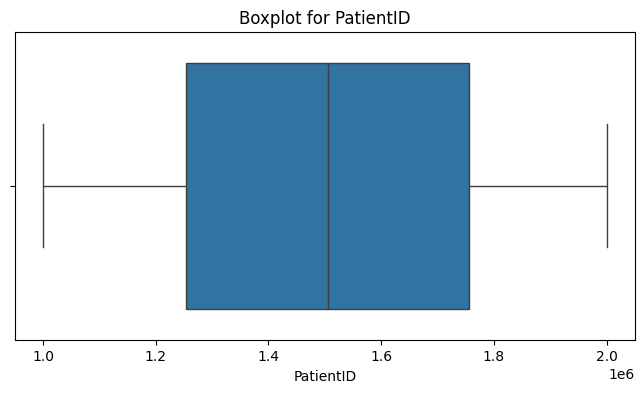

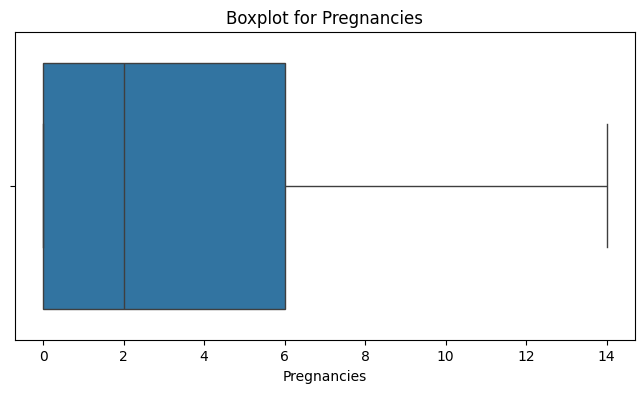

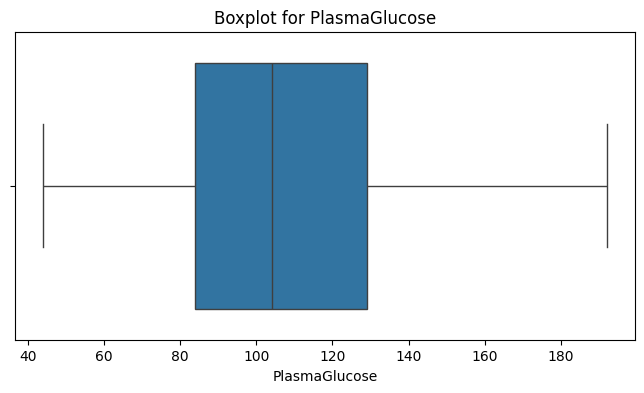

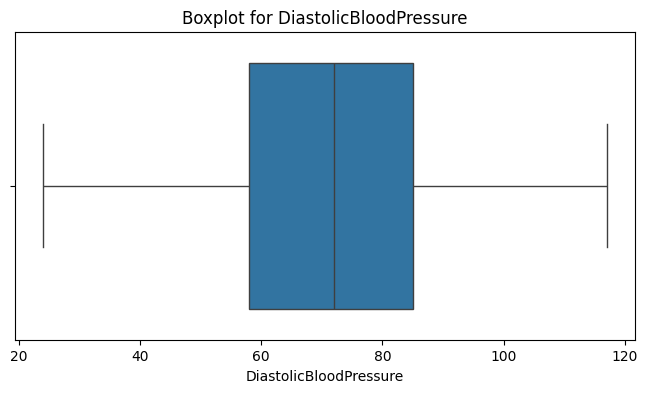

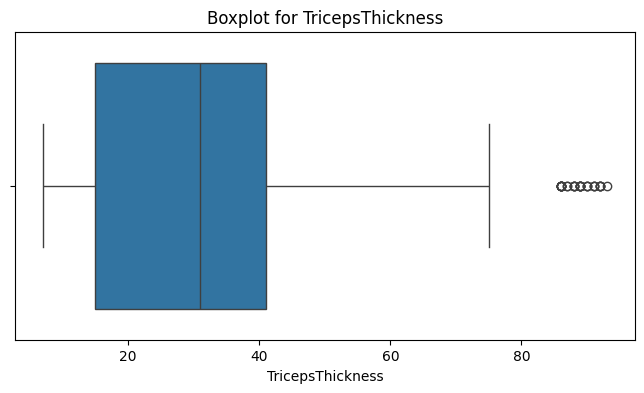

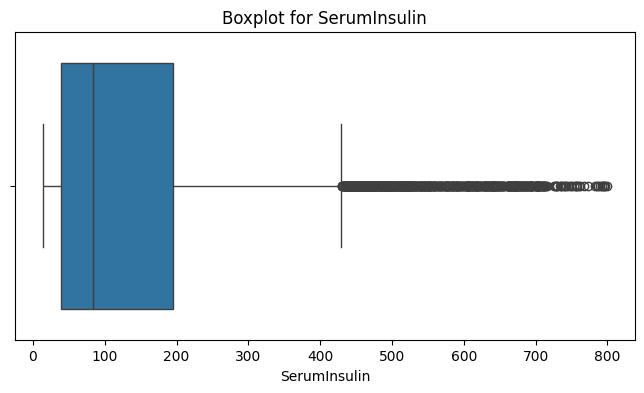

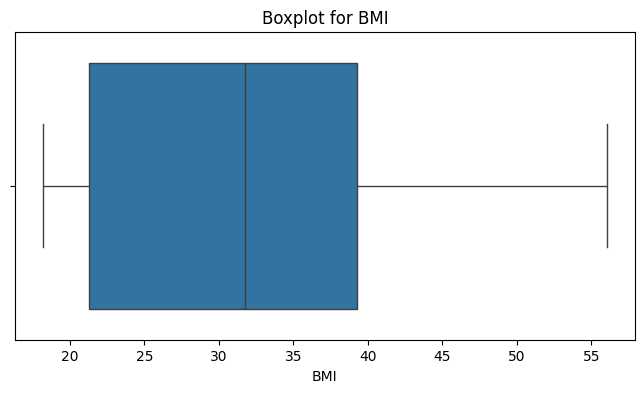

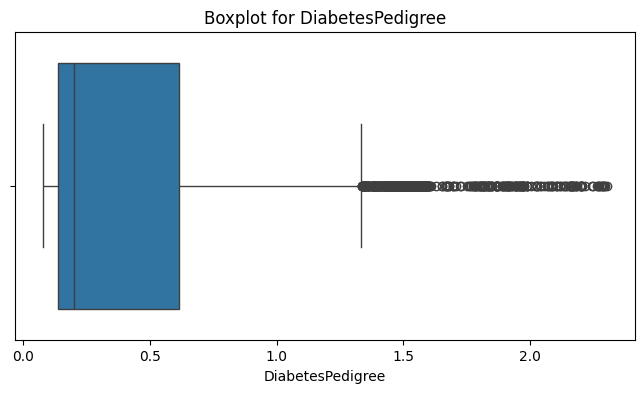

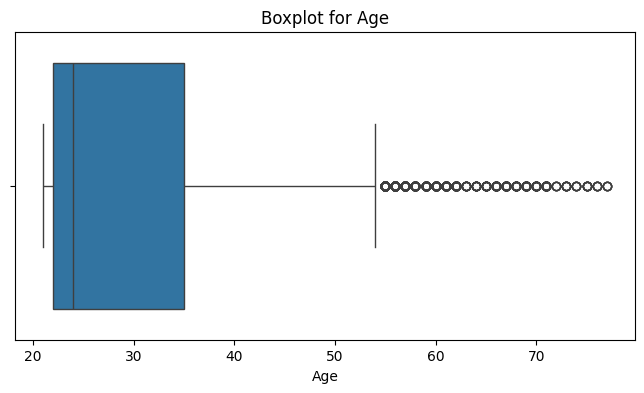

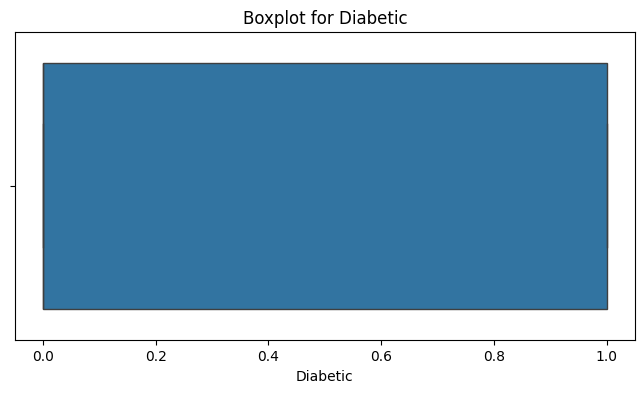

In [9]:

data = diabetes
 
# Boxplot for numerical columns
numeric_cols = data.select_dtypes(include='number').columns
 
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [10]:
# Option 1: Remove outliers
# data_cleaned = data[~outliers]
 
# Option 2: Cap outliers at 99th percentile
for col in numeric_cols:
    upper_limit = data[col].quantile(0.99)
    lower_limit = data[col].quantile(0.01)
    data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)

In [11]:
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778.0,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438.0,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031.0,7,115,47,52,35,41.511523,0.080593,23,0
3,1883350.0,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119.0,1,85,59,27,35,42.604536,0.549542,22,0


In [17]:
diabetes[(diabetes.DiastolicBloodPressure > 30) & (diabetes.DiastolicBloodPressure < 40)]

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
9,1403912.0,1,72,39,40,42,36.889576,0.103944,26,0
18,1536832.0,8,117,39,32,164,21.230996,0.089363,25,0
79,1488702.0,1,71,39,52,33,21.306760,0.299809,22,0
119,1772954.0,0,69,39,43,16,32.657334,0.273091,24,0
138,1140834.0,7,69,39,45,159,21.058180,0.153956,34,0
...,...,...,...,...,...,...,...,...,...,...
14573,1712618.0,7,144,39,42,28,18.596925,0.176466,22,0
14670,1490326.0,0,98,39,25,75,19.736378,0.139937,34,0
14690,1827148.0,0,96,39,27,18,38.316630,0.760588,22,1
14868,1330954.0,10,153,39,35,196,40.636572,0.509870,21,0


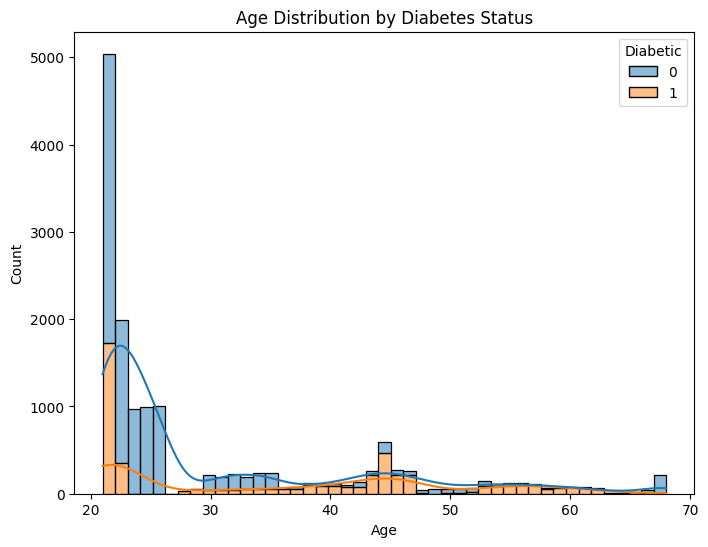

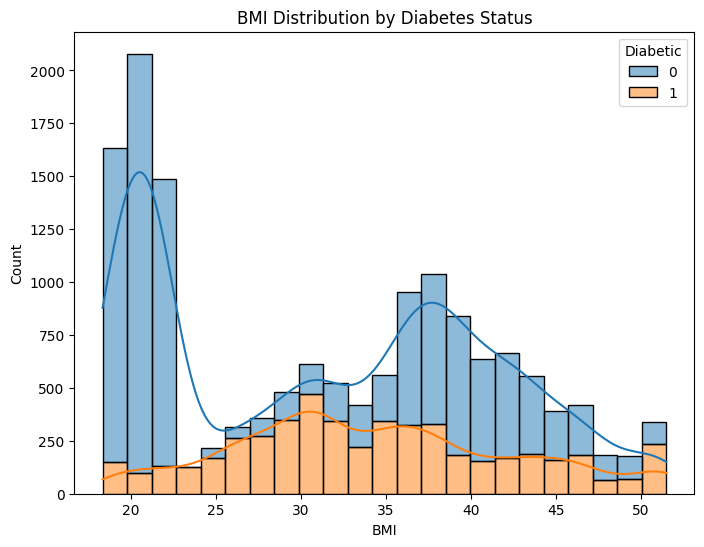

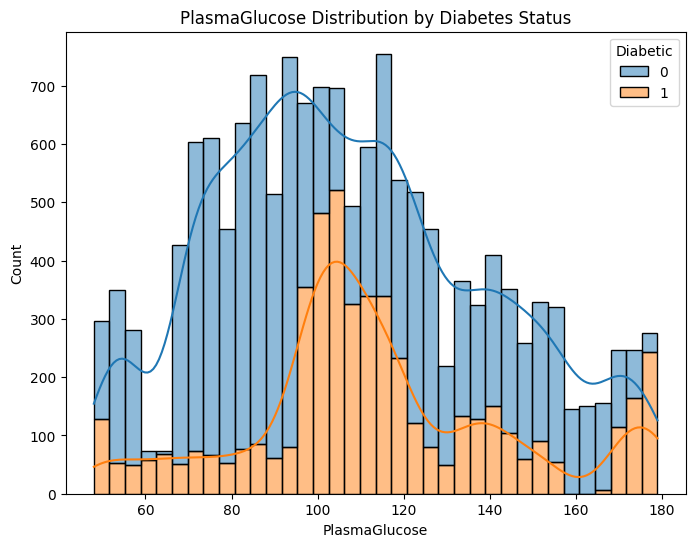

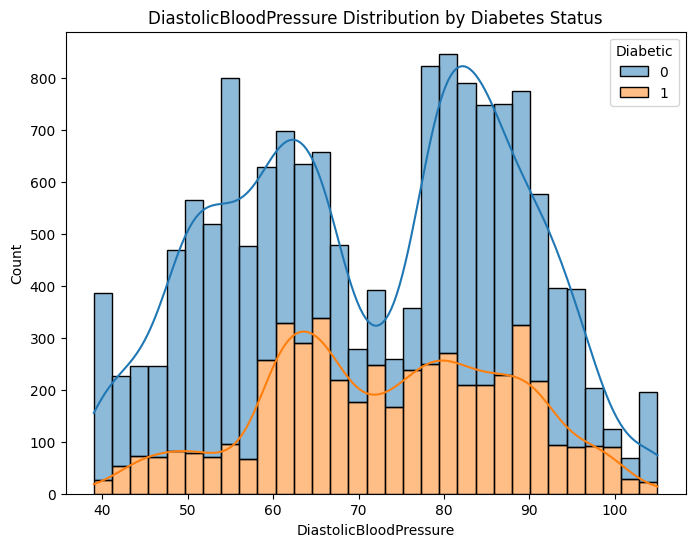

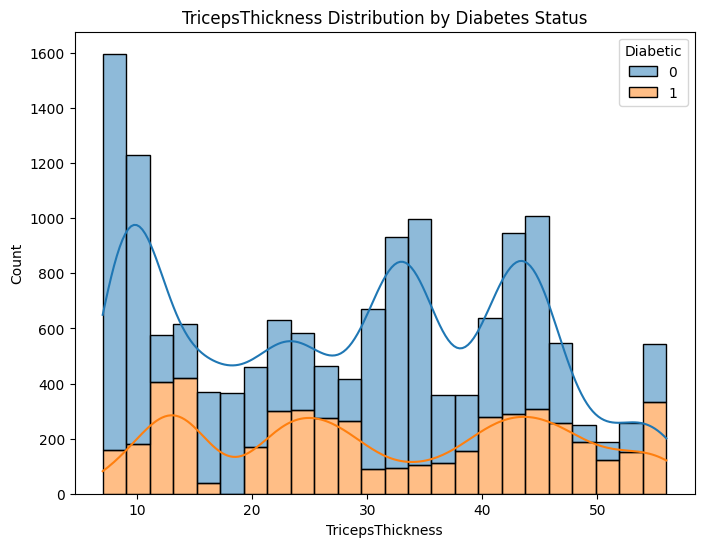

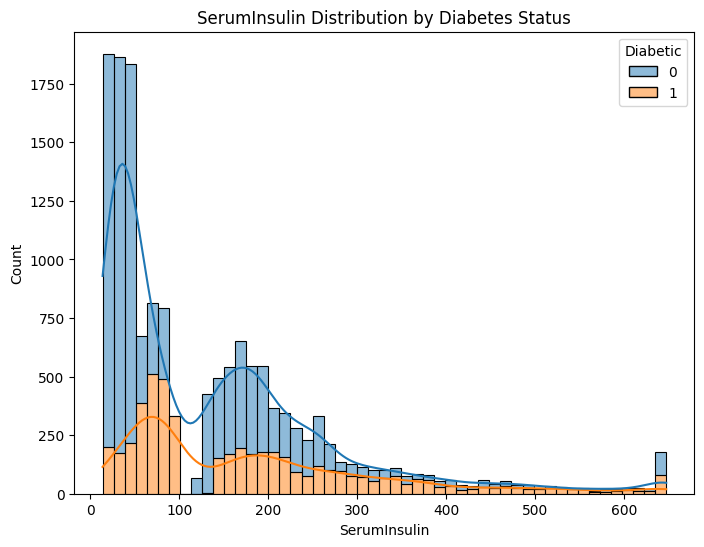

In [18]:
# List of continuous features
continuous_features = [
    'Age', 'BMI', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness',
    'SerumInsulin'
]
 
# Plot histograms for continuous features
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=feature, hue='Diabetic', kde=True, multiple='stack')
    plt.title(f'{feature} Distribution by Diabetes Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [19]:
diabetes.Diabetic.value_counts()

Diabetic
0    10000
1     5000
Name: count, dtype: int64

#### DB File

In [13]:
# create an sqlite database connection
# and dump the data into the db
conn = sql.connect('data/TAIPEI_diabetes.db')
diabetes.to_sql('diabetes', conn, if_exists='replace', index=False)

15000

In [18]:
type(conn)
type(diabetes)

pandas.core.frame.DataFrame

In [25]:
# read the data directly from the db
diabetes = pd.read_sql('SELECT * FROM diabetes', conn)

In [26]:
diabetes

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


#### CSV File

In [30]:
diabetes_csv

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [8]:
diabetes_csv.isna().sum()
# notes : no missing values

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

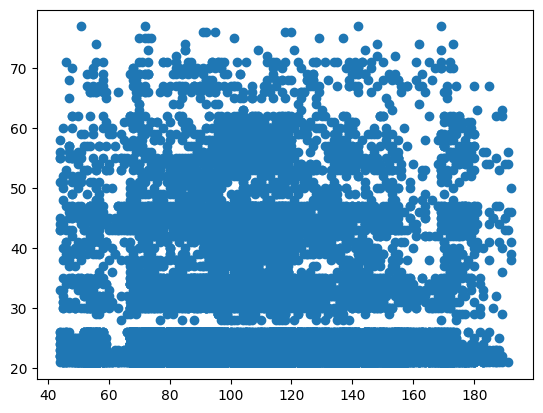

In [32]:
# i want a graph of PlasmaGlucose and age
plt.scatter(diabetes['PlasmaGlucose'], diabetes['Age'])


## 1. Defining the problem

### Ask a quesion

*"Using this dataset, you should build a model to predict the Diabetic outcome (Diabetic) using the different features. You will apply the steps of a machine learning pipeline as seen in class to build and deploy a small web application that takes an input on an interface and returns the predictionfor the diabetic outcome. The details of the web application implementation (framework, style,etc.) are left to you."*

**Question :** Can we predict if someone is diabtic ?

### Type of ML approach

**Type :** Classification

#### Applications of Classification Models

Classification models are a type of ML model used to assign a label or class to input data, as being diabetic or not. Classification tasks can be categorized into different types including binary classification (diabetic = 1, non diabetic = 0).

#### Classification Algorithms

Classification models can be trained using various algorithms, including decision trees, support vector machines, and random forests. Decision trees are a type of supervised learning algorithm that use a tree-like model to classify input data. Support vector machines are a type of supervised learning algorithm that use a hyperplane to classify input data. Random forests are a type of ensemble learning algorithm that combine multiple decision trees to classify input data.

#### Evaluation Metrics

The performance of classification models can be evaluated using metrics such as accuracy, precision, recall, and F1 score. 

Accuracy measures the proportion of correctly classified instances, while precision measures the proportion of true positives among all positives predictions. Recall measures the proportion of true positives among all actual positive instances, while F1 score measures the harmonic mean of precision and recall.

### Getting the dataset

Dataset available : **The dataset – TAIPEI_diabetes.csv**

The dataset provides attributes for 15000 women on 8 features:

* ***Pregnancies:*** Number of times pregnant
* ***PlasmaGlucose:*** Plasma glucose concentration after 2 hours in an oral glucose tolerance test
* ***DiastolicBloodPressure:*** Diastolic blood pressure (mm Hg)
* ***TricepsThickness:*** Triceps skin fold thickness (mm)
* ***SerumInsulin:*** 2-Hour serum insulin (mu U/ml)
* ***BMI:*** Body mass index (weight in kg/(height in m)^2)
* ***DiabetesPedigree:*** A function that scores the probability of diabetes based on family history
* ***Age:*** Age in years the species

And the variable to predict is in the last column of the table:

* ***Diabetic:*** 1 = diabetes diagnosed, 0 = no diabetes diagnosed

## 2. Exploratory Data Analysis (EDA)

### Missing values / Null / inconsistencies

In [4]:
diabetes_csv_raw = diabetes_csv.copy()

In [1]:
diabetes_csv

NameError: name 'diabetes_csv' is not defined

In [17]:
diabetes_csv.isna().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [4]:

diabetes_csv.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


From the provided summary statistics, we can infer the possibility of outliers in several features:

1. **Pregnancies:** The maximum value (14) is quite high compared to the mean (3.22) and the 75th percentile (6), suggesting potential outliers.
2. **PlasmaGlucose:** The maximum value (192) is significantly higher than the mean (107.86) and the 75th percentile (129), indicating possible outliers.
3. **DiastolicBloodPressure:** The minimum value (24) and maximum value (117) are far from the mean (71.22) and the 25th (58) and 75th percentiles (85), suggesting potential outliers.
4. **TricepsThickness:** The maximum value (93) is much higher than the mean (28.81) and the 75th percentile (41), indicating possible outliers.
5. **SerumInsulin:** The maximum value (799) is extremely high compared to the mean (137.85) and the 75th percentile (195), suggesting significant outliers.
6. **BMI:** The maximum value (56.03) is higher than the mean (31.51) and the 75th percentile (39.26), indicating potential outliers.
7. **DiabetesPedigree:** The maximum value (2.301) is much higher than the mean (0.40) and the 75th percentile (0.62), suggesting possible outliers.
8. **Age:** The maximum value (77) is higher than the mean (30.14) and the 75th percentile (35), indicating potential outliers.

In summary, the large differences between the maximum values and the 75th percentiles, as well as the high standard deviations relative to the means, suggest the presence of outliers in several features. Further analysis, such as visualizing the data with box plots or using statistical methods to detect outliers, would be necessary to confirm and handle these outliers.

**Using the IQR Method**

*The IQR method identifies outliers as points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.*

In [35]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = diabetes_csv.quantile(0.25)
Q3 = diabetes_csv.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((diabetes_csv < (Q1 - 1.5 * IQR)) | (diabetes_csv > (Q3 + 1.5 * IQR))).sum()

# Display the number of outliers in each column
print("Number of outliers in each column using IQR:")
print(outliers)

Number of outliers in each column using IQR:
PatientID                    0
Pregnancies                  0
PlasmaGlucose                0
DiastolicBloodPressure       0
TricepsThickness            31
SerumInsulin               666
BMI                          0
DiabetesPedigree           475
Age                       1019
Diabetic                     0
dtype: int64


**Using the Z-score Method**

*The Z-score method identifies outliers as points with a Z-score greater than 3 or less than -3.*

In [36]:

# Calculate Z-scores
z_scores = np.abs(stats.zscore(diabetes_csv.select_dtypes(include=[np.number])))

# Identify outliers
outliers = (z_scores > 3).sum(axis=0)

# Display the number of outliers in each column
print("Number of outliers in each column using Z-score:")
print(outliers)

Number of outliers in each column using Z-score:
PatientID                   0
Pregnancies                29
PlasmaGlucose               0
DiastolicBloodPressure      0
TricepsThickness           44
SerumInsulin              335
BMI                         0
DiabetesPedigree          254
Age                       218
Diabetic                    0
dtype: int64


Based on the results from both the IQR and Z-score methods, we can identify the columns with significant outliers:

#### IQR Method:
- **TricepsThickness**: 31 outliers
- **SerumInsulin**: 666 outliers
- **DiabetesPedigree**: 475 outliers
- **Age**: 1019 outliers

#### Z-score Method:
- **Pregnancies**: 29 outliers
- **TricepsThickness**: 44 outliers
- **SerumInsulin**: 335 outliers
- **DiabetesPedigree**: 254 outliers
- **Age**: 218 outliers

#### Observations:
- **TricepsThickness**, **SerumInsulin**, **DiabetesPedigree**, and **Age** have a significant number of outliers in both methods.
- **Pregnancies** has outliers identified only by the Z-score method.

#### Next Steps:
1. **Visualize Outliers**: Use box plots to visualize the outliers for these columns.
2. **Decide on Handling**: Decide whether to remove, transform, or use robust methods to handle these outliers.

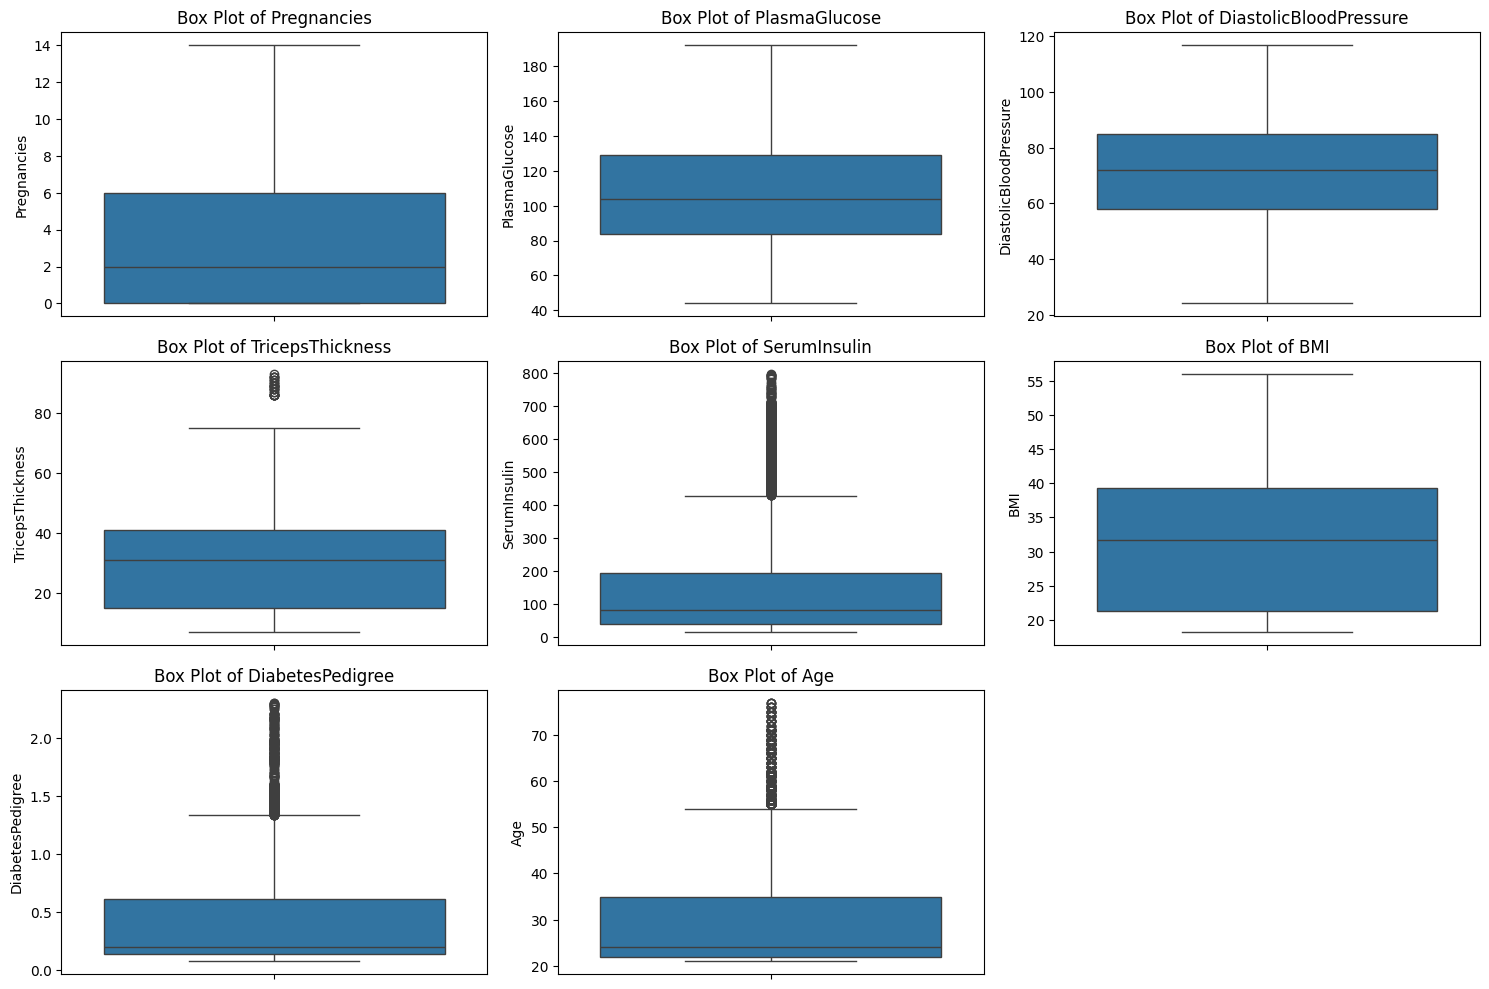

In [39]:
### Visualization Example:

# Columns with significant outliers
columns_with_outliers = ["Pregnancies", "PlasmaGlucose", "DiastolicBloodPressure", "TricepsThickness",
    "SerumInsulin", "BMI", "DiabetesPedigree", "Age"]

# Plotting box plots for each feature with outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_with_outliers, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=diabetes_csv[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()


The dataset descriptive statistics align broadly with the types of data and ranges expected based on the reviewed ressources document. Here's a detailed evaluation of potential outliers and insights for each column in your dataset, incorporating insights from the paper:

---

#### Feature Analysis:
1. **Pregnancies**:
   - **Max**: 14; **Mean**: 3.22; **75th Percentile**: 6.
   - Having 14 pregnancies is at the extreme end and could represent an outlier, especially for younger individuals. The document does not provide specific age-pregnancy distributions, but 14 is highly unusual under 21.

2. **PlasmaGlucose**:
   - **Max**: 192; **Mean**: 107.86; **75th Percentile**: 129.
   - The maximum is elevated but could reflect realistic values for individuals with poorly controlled diabetes. Values above 160–180 might need further investigation.

3. **DiastolicBloodPressure**:
   - **Min**: 24; **Mean**: 71.22; **25th Percentile**: 58.
   - A diastolic blood pressure of 24 is highly implausible for a living patient and should be considered an outlier.

4. **TricepsThickness**:
   - **Min**: 7; **Max**: 93; **Mean**: 28.81.
   - The range is wide, with 7 being unusually low and 93 being extreme. Both might represent errors or rare conditions and could be flagged as potential outliers.

5. **SerumInsulin**:
   - **Max**: 799; **Mean**: 137.85; **75th Percentile**: 195.
   - The maximum of 799 is well above the 75th percentile, making it a strong candidate for an outlier. The document mentions high insulin levels but doesn't specify thresholds.

6. **BMI**:
   - **Max**: 56.03; **Mean**: 31.51; **75th Percentile**: 39.26.
   - A BMI of 56.03 is extremely high and likely represents severe obesity. This could be valid but rare.

7. **DiabetesPedigree**:
   - **Max**: 2.30; **Mean**: 0.39; **75th Percentile**: 0.62.
   - The maximum of 2.30 is far from the mean and likely an outlier. Pedigree values this high are unusual but may represent strong genetic predispositions.

8. **Age**:
   - **Max**: 77; **Mean**: 30.14; **75th Percentile**: 35.
   - The range is consistent with the study population (20–80 years). No clear outliers here.

9. **Diabetic**:
   - Binary outcome (0 or 1). The distribution appears normal with a mean of 0.33 (roughly 33% prevalence).

---

#### Observations:
- **Outliers to Investigate**:
  - **Pregnancies**: Values ≥10 should be flagged and examined for biological plausibility.
  - **DiastolicBloodPressure**: Values <40 are implausible and likely errors.
  - **TricepsThickness**: Values <10 or >70 might be errors or rare conditions.
  - **SerumInsulin**: Values >400 could represent outliers or rare cases of insulin resistance.
  - **DiabetesPedigree**: Values >2 may be extreme outliers but might have clinical significance.

- **Statistical Methods**:
  - Use IQR and standard deviation to confirm these outliers.
  - Visualize data (e.g., boxplots, histograms) for a clearer view.


### Outliers Investigation

#### a. Potential outliers in pregnancy

Values range from 0 to 14. Extreme values like 14 could represent unusual cases but are possible (e.g., in women with early onset of childbearing). If age data confirms implausibility (e.g., pregnancies starting before puberty), these might be flagged as errors.

Context:

* Having 14 pregnancies is rare, especially for younger individuals. For a 20-year- woman, this is biologically improbable due to the time constraints (each pregnancy lasting about 9 months) and the physical toll of multiple pregnancies.

Why It's Unusual:

* Even in populations with high fertility rates, such a high number is exceptional by age 21.
* Possible causes:
    * Outlier: Represents an extremely rare case.
    * Error: Misrecorded number (e.g., cumulative pregnancies reported inaccurately).

In [25]:
# row of max pregnancies below the age of 25
diabetes_csv[(diabetes_csv['Pregnancies'] == diabetes_csv['Pregnancies'].max()) & (diabetes_csv['Age'] < 25)]

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
984,1503348,14,119,62,38,682,35.121129,0.167564,23,1
1206,1782435,14,113,67,92,29,36.421134,0.834632,21,1
1249,1918441,14,99,24,45,521,36.846924,1.020896,21,1
1649,1969360,14,130,65,32,303,45.752172,0.948229,22,1
2752,1811316,14,120,64,89,372,35.803242,1.374491,23,1
5255,1723630,14,118,47,28,90,32.701074,0.146053,21,1
6249,1060285,14,102,86,53,214,38.025630,0.497183,22,1
7924,1042275,14,111,68,27,482,40.119839,0.756078,22,1
8212,1437892,14,144,67,42,337,35.023901,0.822987,21,1
8776,1351763,14,114,76,12,55,30.665377,0.886569,22,1


#### b. PlasmaGlucose (Max: 192) ?

Context:

* Plasma glucose levels are measured after 2 hours of an oral glucose tolerance test (OGTT). Normal levels are <140 mg/dL. Levels above 200 mg/dL typically indicate diabetes.

Why It's Unusual:

* While a value of 192 mg/dL is high, it falls within plausible ranges for individuals with diabetes or impaired glucose tolerance.
* This is not necessarily an error, but high values (close to 200) should be verified to ensure correct measurement.

Possible causes:

* Outliers could represent extreme cases of uncontrolled diabetes.

In [34]:
# row of plasma glucose above 160
diabetes_csv[diabetes_csv['PlasmaGlucose'] > 160].sort_values(by='PlasmaGlucose', ascending=False)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
4797,1782208,6,192,67,13,40,33.525940,0.184813,38,1
11136,1358057,4,192,59,55,147,33.594727,0.259941,41,1
1630,1282735,1,192,67,21,311,29.790790,0.141019,50,1
702,1716863,3,192,64,12,90,26.783882,0.886177,46,1
1957,1135563,3,192,85,39,85,23.405390,0.728136,39,1
...,...,...,...,...,...,...,...,...,...,...
4694,1601840,9,161,88,25,18,20.872046,0.222198,23,0
5933,1753254,9,161,87,14,49,18.269525,0.104753,68,0
13248,1998548,1,161,68,43,54,40.961158,0.437551,22,0
13274,1016985,0,161,92,39,27,25.738726,0.096094,30,0


#### c. DiastolicBloodPressure (Min: 24):

Context:

* Normal diastolic blood pressure ranges between 60–80 mmHg. Values below 40 mmHg are physiologically implausible in healthy individuals.

Why It's Unusual:

* A diastolic blood pressure of 24 mmHg indicates extreme hypotension, often associated with life-threatening conditions like:
    * Cardiovascular shock.
    * Severe blood loss or dehydration.
* In a dataset focused on diabetes prediction, this value is most likely an error rather than a valid measurement.

In [36]:
# row of diastolic blood pressure below 40
diabetes_csv[diabetes_csv['DiastolicBloodPressure'] < 40].sort_values(by='DiastolicBloodPressure', ascending=False)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
18,1536832,8,117,39,32,164,21.230996,0.089363,25,0
119,1772954,0,69,39,43,16,32.657334,0.273091,24,0
441,1859953,1,99,39,24,135,45.653866,0.271835,31,0
1798,1464907,10,156,39,7,29,36.494779,0.091671,22,0
1199,1295714,0,149,39,41,55,47.136621,0.085062,30,0
...,...,...,...,...,...,...,...,...,...,...
8226,1734406,0,110,24,20,231,21.106011,0.170088,22,0
6882,1347554,0,127,24,16,191,19.407099,0.757921,26,0
12049,1273804,8,132,24,39,21,18.291302,0.640311,21,1
13912,1019647,12,106,24,14,196,27.893586,0.206849,57,1


#### d. TricepsThickness (Min: 7, Max: 93) 

Context:

* Normal triceps skinfold thickness ranges between 10–50 mm for most populations. Lower values (<10) might indicate malnutrition, while higher values (>50) suggest extreme obesity.

Why It's Unusual:

* 7 mm: Implies very low subcutaneous fat, which is rare even in underweight individuals.
* 93 mm: Indicates an extremely high level of body fat. While possible in severely obese individuals, it is rare.

Possible causes:

* Measurement errors or outliers representing extreme nutritional states.

In [24]:
# row of triceps thickness above 50
diabetes_csv[(diabetes_csv['TricepsThickness'] > 90) & (diabetes_csv['Age'] < 24)].sort_values(by='TricepsThickness', ascending=False)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
13382,1114904,2,62,78,93,68,29.208568,0.608460,23,1
1206,1782435,14,113,67,92,29,36.421134,0.834632,21,1
2386,1065737,4,114,87,92,172,26.683937,0.139685,21,1
11887,1565894,9,148,62,92,271,26.808369,0.163537,23,1
12559,1642224,6,73,68,91,80,18.565014,1.109445,22,1


#### e. SerumInsulin (Max: 799):

Context:

* Normal fasting serum insulin levels are typically between 16–166 μU/mL. Even after glucose intake, levels rarely exceed 300–400 μU/mL in most populations.

Why It's Unusual:

* 799 μU/mL is extremely high and suggests:
    * Severe insulin resistance or a rare metabolic condition like insulinoma (insulin-producing tumor).
* Likely causes:
    * A true outlier reflecting a unique physiological state.
    * Data-entry or measurement error.

In [40]:
# row of serum insulin above 600
diabetes_csv[diabetes_csv['SerumInsulin'] > 600].sort_values(by='SerumInsulin', ascending=False)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
10708,1622761,4,102,76,42,799,27.783707,0.116064,21,1
3410,1081473,11,101,66,56,796,27.251492,0.181608,21,1
10541,1616531,6,153,66,43,795,35.683873,0.143846,23,1
5419,1394841,2,139,90,43,795,26.413401,1.556376,41,1
6153,1423954,9,136,79,48,793,22.480865,0.701745,44,1
...,...,...,...,...,...,...,...,...,...,...
3187,1781377,4,172,82,43,604,30.868043,0.684280,36,1
12864,1009906,0,84,78,8,604,20.867272,0.113957,69,0
12383,1758343,7,170,59,11,604,30.810391,0.174008,40,1
12338,1244361,3,117,73,46,602,36.525156,0.111161,21,1


#### f. BMI (Max: 56.03):

Context:

* BMI values between 18.5–24.9 are considered normal, while values above 30 indicate obesity. Values >50 represent severe or morbid obesity.

Why It's Unusual:

* A BMI of 56.03 reflects extreme obesity, which is rare but plausible in populations with high obesity rates.
* Possible causes:
    * Outlier: Represents severe obesity.
    * Error: Incorrect height or weight data

In [42]:
# row of BMI above 50
diabetes_csv[diabetes_csv['BMI'] > 50].sort_values(by='BMI', ascending=False)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
4325,1361794,9,102,85,54,91,56.034628,0.150969,47,1
13949,1490092,2,170,52,25,234,55.975311,0.187993,57,1
9846,1641055,3,105,67,54,62,55.947183,0.541826,46,1
11485,1937419,7,121,67,40,78,55.906470,0.158882,38,1
4278,1339932,7,113,61,22,268,55.866238,0.194955,44,1
...,...,...,...,...,...,...,...,...,...,...
6196,1274918,6,45,67,44,89,50.081175,0.860055,60,1
6946,1812056,0,74,61,45,22,50.069628,0.110141,22,0
3795,1580404,1,126,78,10,42,50.059338,0.080744,24,0
5130,1031818,11,94,89,35,511,50.021366,1.399054,21,0


#### g. DiabetesPedigree (Max: 2.301)

Context:

* The diabetes pedigree function scores the probability of developing diabetes based on family history, with typical values below 1.0.

Why It's Unusual:

* A value of 2.301 indicates an extremely high genetic predisposition to diabetes, which is rare.
* Likely causes:
    * Outlier reflecting a unique genetic background.
    * Data-entry or computation error.

In [46]:
# row of diabetes pedigree above 1.5
diabetes_csv[diabetes_csv['DiabetesPedigree'] > 1.5].sort_values(by='DiabetesPedigree', ascending=False)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
9997,1410962,5,99,59,47,67,30.774018,2.301594,43,1
10705,1702050,1,118,74,15,490,34.056641,2.296062,44,1
5806,1065970,9,105,68,21,505,39.269105,2.291294,47,1
1378,1371083,3,104,43,47,51,24.730993,2.287388,22,1
2334,1492381,12,106,64,13,319,52.530825,2.285180,46,1
...,...,...,...,...,...,...,...,...,...,...
2114,1398671,7,126,84,7,239,20.232268,1.501555,44,1
806,1370529,5,114,47,40,234,31.302207,1.501065,34,1
2962,1618969,5,56,108,44,72,29.953525,1.500675,44,1
11950,1320738,7,86,88,53,680,38.659899,1.500148,22,1



#### Summary of Why These Values Are Unusual:
| Feature                  | Implausibility or Unusualness | Likely Cause                        |
|--------------------------|-------------------------------|-------------------------------------|
| Pregnancies              | Rare for young individuals    | Outlier or error                    |
| PlasmaGlucose            | High but plausible            | Valid outlier                       |
| DiastolicBloodPressure    | Below physiologically viable  | Likely error                        |
| TricepsThickness         | Extremely low or high         | Outlier or error                    |
| SerumInsulin             | Extremely high                | Outlier or rare condition           |
| BMI                      | Severe obesity                | Valid outlier                       |
| DiabetesPedigree         | Extremely high                | Outlier or computation error        |
| Age                      | Within range                  | No issue                            |

### Statistical Analysis

### Plotting

Text(0.5, 1.0, 'Age Distribution')

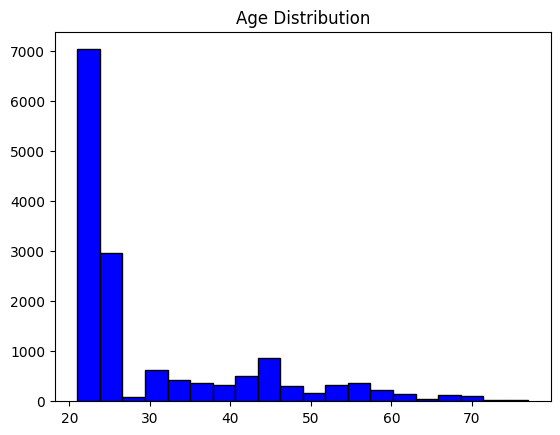

In [9]:
plt.hist(diabetes['Age'], bins=20, color='blue', edgecolor='black')
plt.title('Age Distribution')

array([[<Axes: title={'center': 'PatientID'}>,
        <Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'PlasmaGlucose'}>],
       [<Axes: title={'center': 'DiastolicBloodPressure'}>,
        <Axes: title={'center': 'TricepsThickness'}>,
        <Axes: title={'center': 'SerumInsulin'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigree'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Diabetic'}>, <Axes: >, <Axes: >]],
      dtype=object)

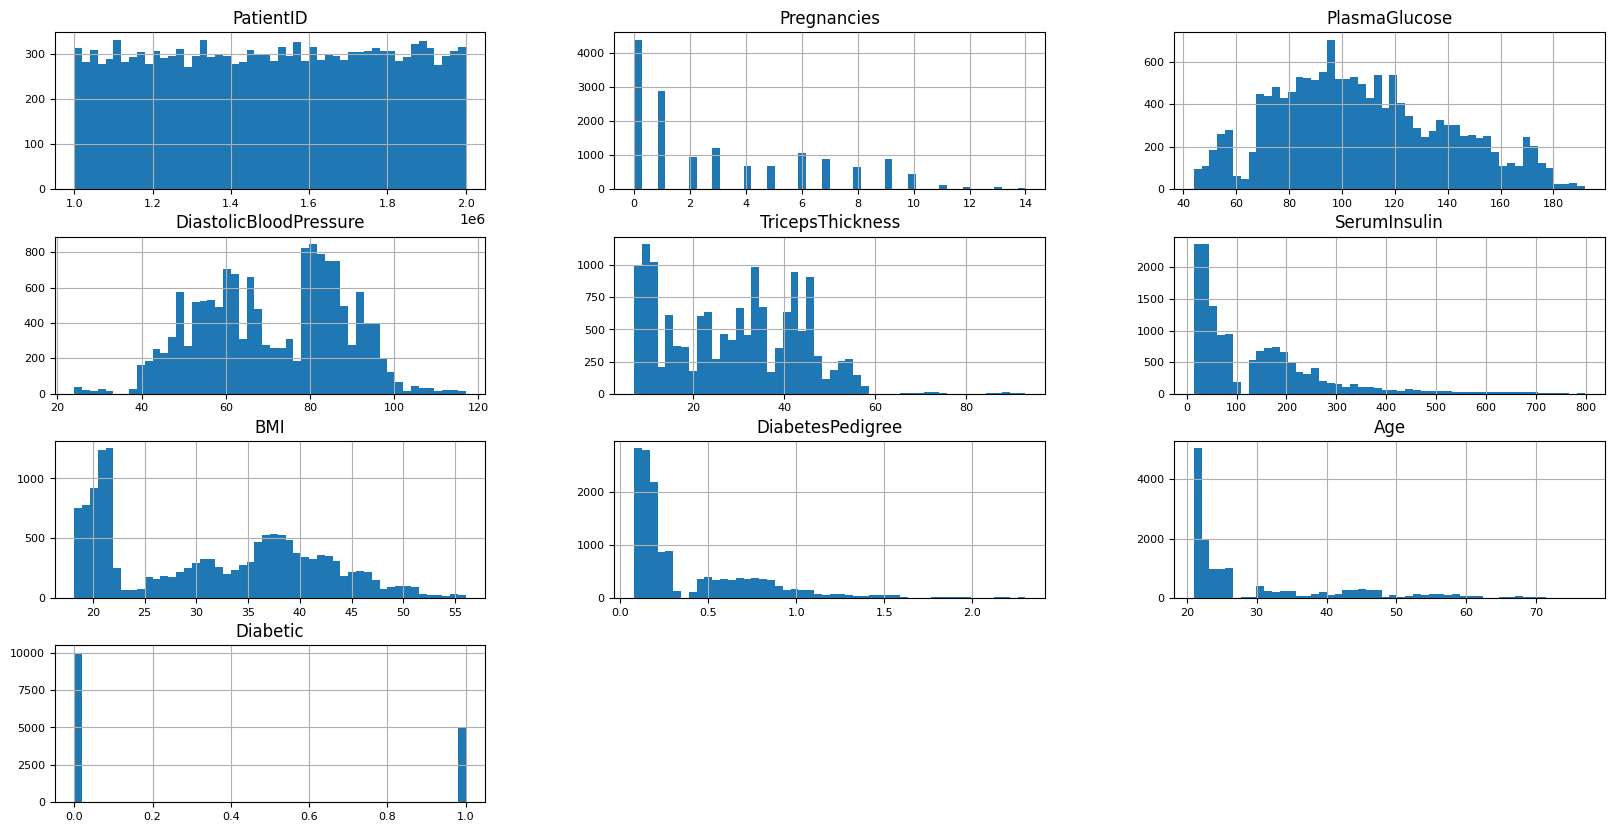

In [5]:
# plot every column
diabetes.hist(figsize=(20, 10), bins=50, xlabelsize=8, ylabelsize=8)
# add labels


meeting :

compare with PIMA dataset the extremum -> to get incertitude if there are true or not?

what variable can we cross ?
- 

make a model with one or two variable and after with all the dataset

and compare again with PIMA dataset

#### Comparison with PIMA dataset

In [4]:
# import PIMA diabetes dataset
pima_diabetes = pd.read_csv('ressources/kaggle/diabetes.csv')

# display the first few rows of the dataset
pima_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Calculate min and max for each column in pima_diabetes
pima_min_max = pima_diabetes.agg(['min', 'max']).T
pima_min_max.columns = ['Pima_Min', 'Pima_Max']

# Calculate min and max for each column in diabetes_csv
diabetes_min_max = diabetes_csv.agg(['min', 'max']).T
diabetes_min_max.columns = ['Diabetes_Min', 'Diabetes_Max']

# Combine the results into a single dataframe for comparison
comparison = pima_min_max.join(diabetes_min_max)
comparison

,Pima_Min,Pima_Max,Diabetes_Min,Diabetes_Max
Pregnancies,0.000,17.00,0.000000,14.000000
Glucose,0.000,199.00,NaN,NaN
BloodPressure,0.000,122.00,NaN,NaN
SkinThickness,0.000,99.00,NaN,NaN
Insulin,0.000,846.00,NaN,NaN
BMI,0.000,67.10,18.200512,56.034628
DiabetesPedigreeFunction,0.078,2.42,NaN,NaN
Age,21.000,81.00,21.000000,77.000000
Outcome,0.000,1.00,NaN,NaN


In [6]:
diabetes_csv.min()

PatientID                 1.000038e+06
Pregnancies               0.000000e+00
PlasmaGlucose             4.400000e+01
DiastolicBloodPressure    2.400000e+01
TricepsThickness          7.000000e+00
SerumInsulin              1.400000e+01
BMI                       1.820051e+01
DiabetesPedigree          7.804379e-02
Age                       2.100000e+01
Diabetic                  0.000000e+00
dtype: float64

The presence of NaN values in the diabetes_min_max DataFrame despite no NaN values in the original dataset could be due to differences in the columns between pima_diabetes and diabetes_csv. If a column exists in one DataFrame but not the other, the join operation will result in NaN values for the missing columns.

To diagnose and fix this issue, you can:

Check for Column Differences: Ensure both DataFrames have the same columns.
Align Columns Before Joining: Align the columns of both DataFrames before performing the join.
Step-by-Step Solution

In [7]:
# Check columns in both DataFrames
pima_columns = set(pima_diabetes.columns)
diabetes_columns = set(diabetes_csv.columns)

# Identify columns that are not common
columns_not_in_pima = diabetes_columns - pima_columns
columns_not_in_diabetes = pima_columns - diabetes_columns

print("Columns in diabetes_csv but not in pima_diabetes:", columns_not_in_pima)
print("Columns in pima_diabetes but not in diabetes_csv:", columns_not_in_diabetes)

Columns in diabetes_csv but not in pima_diabetes: {'TricepsThickness', 'Diabetic', 'SerumInsulin', 'PatientID', 'PlasmaGlucose', 'DiastolicBloodPressure', 'DiabetesPedigree'}
Columns in pima_diabetes but not in diabetes_csv: {'Glucose', 'DiabetesPedigreeFunction', 'BloodPressure', 'Outcome', 'Insulin', 'SkinThickness'}


In [8]:
# Rename columns in diabetes_csv to match pima_diabetes
diabetes_csv_renamed = diabetes_csv.rename(columns={
    'Diabetic': 'Outcome',
    'PatientID': 'PatientID',  # Assuming PatientID is not present in pima_diabetes
    'DiastolicBloodPressure': 'BloodPressure',
    'DiabetesPedigree': 'DiabetesPedigreeFunction',
    'PlasmaGlucose': 'Glucose',
    'SerumInsulin': 'Insulin',
    'TricepsThickness': 'SkinThickness'
})

# Drop PatientID column if it is not present in pima_diabetes
diabetes_csv_renamed = diabetes_csv_renamed.drop(columns=['PatientID'], errors='ignore')

In [9]:
# Calculate min and max for each column in pima_diabetes
pima_min_max = pima_diabetes.agg(['min', 'max']).T
pima_min_max.columns = ['Pima_Min', 'Pima_Max']

# Calculate min and max for each column in diabetes_csv_renamed
diabetes_min_max = diabetes_csv_renamed.agg(['min', 'max']).T
diabetes_min_max.columns = ['Diabetes_Min', 'Diabetes_Max']

# Combine the results into a single DataFrame for comparison
comparison = pima_min_max.join(diabetes_min_max)
print(comparison)

                          Pima_Min  Pima_Max  Diabetes_Min  Diabetes_Max
Pregnancies                  0.000     17.00      0.000000     14.000000
Glucose                      0.000    199.00     44.000000    192.000000
BloodPressure                0.000    122.00     24.000000    117.000000
SkinThickness                0.000     99.00      7.000000     93.000000
Insulin                      0.000    846.00     14.000000    799.000000
BMI                          0.000     67.10     18.200512     56.034628
DiabetesPedigreeFunction     0.078      2.42      0.078044      2.301594
Age                         21.000     81.00     21.000000     77.000000
Outcome                      0.000      1.00      0.000000      1.000000


In [10]:
# Check the row in the PIMA dataset where pregnancies is equal to 17
pima_diabetes[pima_diabetes['Pregnancies'] == 17]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.9,0.817,47,1


In [11]:
# Assuming pima_diabetes has the following column names:
# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'

# Row of max pregnancies for age below 25
pima_diabetes[(pima_diabetes['Pregnancies'] == pima_diabetes['Pregnancies'].max()) & (pima_diabetes['Age'] < 25)]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [12]:
# Row of plasma glucose above 160
pima_diabetes[pima_diabetes['Glucose'] > 160].sort_values(by='Glucose', ascending=False)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1
561,0,198,66,32,274,41.3,0.502,28,1
408,8,197,74,0,0,25.9,1.191,39,1
228,4,197,70,39,744,36.7,2.329,31,0
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
660,10,162,84,0,0,27.7,0.182,54,0
749,6,162,62,0,0,24.3,0.178,50,1
283,7,161,86,0,0,30.4,0.165,47,1
294,0,161,50,0,0,21.9,0.254,65,0


In [37]:
# Row of diastolic blood pressure below 40
pima_diabetes[pima_diabetes['BloodPressure'] < 40].sort_values(by='BloodPressure', ascending=False)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
599,1,109,38,18,120,23.1,0.407,26,0
125,1,88,30,42,99,55.0,0.496,26,1
18,1,103,30,38,83,43.3,0.183,33,0
597,1,89,24,19,25,27.8,0.559,21,0
49,7,105,0,0,0,0.0,0.305,24,0
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
81,2,74,0,0,0,0.0,0.102,22,0
78,0,131,0,0,0,43.2,0.270,26,1
60,2,84,0,0,0,0.0,0.304,21,0


NOTE : recheck this compare to diabetes.csv

In [47]:
# Row of triceps thickness above 50
pima_diabetes[pima_diabetes['SkinThickness'] > 50].sort_values(by='SkinThickness', ascending=False)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1
445,0,180,78,63,14,59.4,2.420,25,1
57,0,100,88,60,110,46.8,0.962,31,0
120,0,162,76,56,100,53.2,0.759,25,1
86,13,106,72,54,0,36.6,0.178,45,0
211,0,147,85,54,0,42.8,0.375,24,0
275,2,100,70,52,57,40.5,0.677,25,0
532,1,86,66,52,65,41.3,0.917,29,0
99,1,122,90,51,220,49.7,0.325,31,1


NOYE : Check age here

Medically speaking, the values provided for a 21-year-old patient are unusual, particularly the SerumInsulin and TricepsThickness values. Let's analyze the possibility of each value:

- Pregnancies: 4 pregnancies by age 21 is possible but relatively uncommon.
- PlasmaGlucose: 102 mg/dL is within the normal range for fasting glucose.
- DiastolicBloodPressure: 76 mmHg is within the normal range.
- TricepsThickness: 42 mm is quite high. Normal values are typically around 10-20 mm. This could indicate an error or an unusual medical condition.
- SerumInsulin: 799 µU/mL is extremely high. Normal fasting insulin levels are typically 2-25 µU/mL. Such a high value is highly unusual and could indicate an error or a severe medical condition.
- BMI: 27.78 is in the overweight range (25-29.9). This is possible for a 21-year-old.
- DiabetesPedigree: 0.116064 is a low value, indicating a lower genetic predisposition to diabetes.
- Age: 21 years old.
- Diabetic: 1 indicates the patient is diabetic.
- Conclusion:
- SerumInsulin: A value of 799 µU/mL is extremely unlikely and suggests a data entry error or a very rare medical condition. Such high insulin levels are not typical and would usually warrant immediate medical attention.
- TricepsThickness: A value of 42 mm is also unusually high and should be verified.
- Pregnancies: While possible, having 4 pregnancies by age 21 is uncommon and should be verified.
- Given these observations, it is advisable to verify the data for accuracy, especially the SerumInsulin and TricepsThickness values, as they are highly unusual for a 21-year-old.

In [41]:
# Row of serum insulin above 600
pima_diabetes[pima_diabetes['Insulin'] > 600].sort_values(by='Insulin', ascending=False)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1
228,4,197,70,39,744,36.7,2.329,31,0
247,0,165,90,33,680,52.3,0.427,23,0


In [43]:
# Row of BMI above 50
pima_diabetes[pima_diabetes['BMI'] > 50].sort_values(by='BMI', ascending=False)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,0,129,110,46,130,67.1,0.319,26,1
445,0,180,78,63,14,59.4,2.420,25,1
673,3,123,100,35,240,57.3,0.880,22,0
125,1,88,30,42,99,55.0,0.496,26,1
120,0,162,76,56,100,53.2,0.759,25,1
303,5,115,98,0,0,52.9,0.209,28,1
193,11,135,0,0,0,52.3,0.578,40,1
247,0,165,90,33,680,52.3,0.427,23,0


In [13]:
# Row of diabetes pedigree above 1.5
pima_diabetes[pima_diabetes['DiabetesPedigreeFunction'] > 1.5].sort_values(by='DiabetesPedigreeFunction', ascending=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180,78,63,14,59.4,2.420,25,1
228,4,197,70,39,744,36.7,2.329,31,0
4,0,137,40,35,168,43.1,2.288,33,1
370,3,173,82,48,465,38.4,2.137,25,1
45,0,180,66,39,0,42.0,1.893,25,1
58,0,146,82,0,0,40.5,1.781,44,0
371,0,118,64,23,89,0.0,1.731,21,0
593,2,82,52,22,115,28.5,1.699,25,0
621,2,92,76,20,0,24.2,1.698,28,0
395,2,127,58,24,275,27.7,1.600,25,0


In [32]:
pima_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


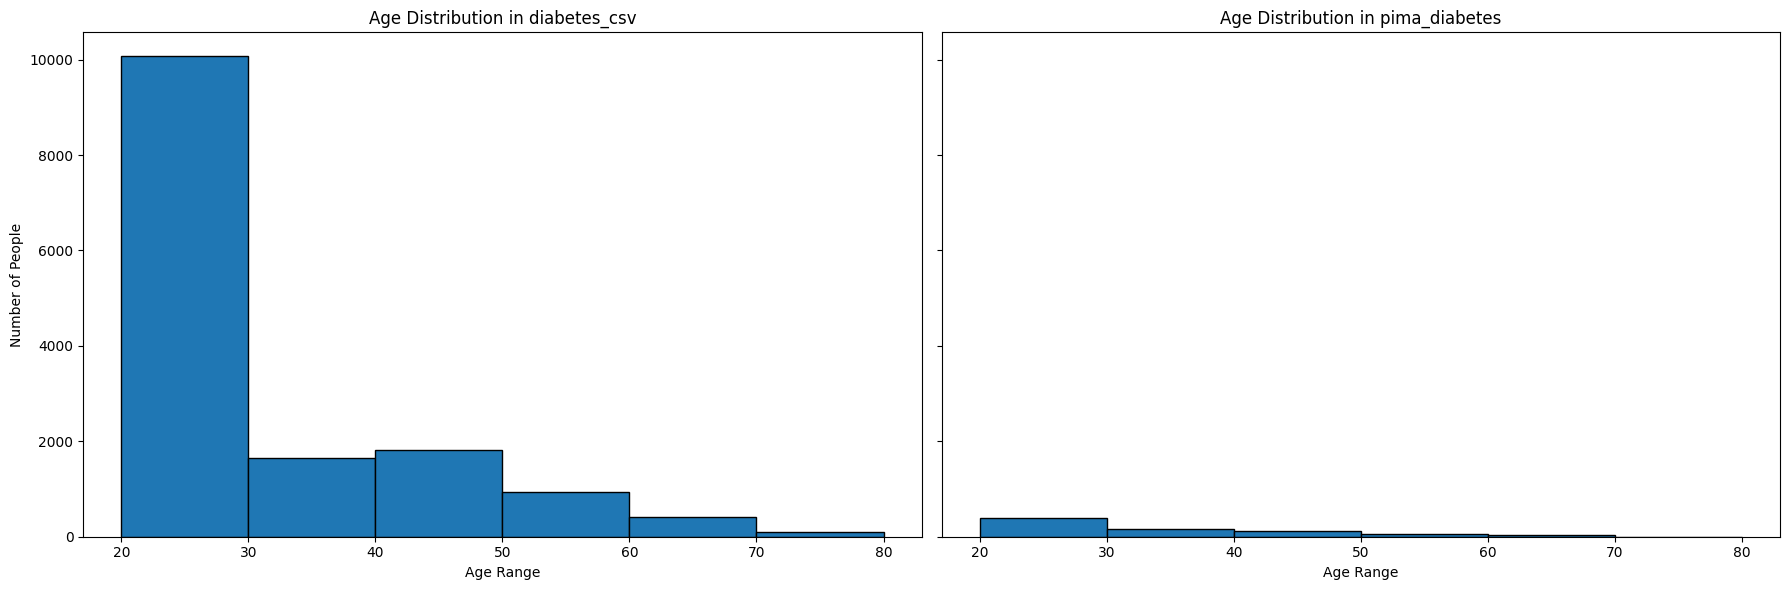

In [50]:
# Define age bins
bins = [20, 30, 40, 50, 60, 70, 80]

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=True)

# Plot histogram for diabetes_csv
axes[0].hist(diabetes_csv['Age'], bins=bins, edgecolor='black')
axes[0].set_title('Age Distribution in diabetes_csv')
axes[0].set_xlabel('Age Range')
axes[0].set_ylabel('Number of People')
axes[0].set_xticks(bins)

# Plot histogram for pima_diabetes
axes[1].hist(pima_diabetes['Age'], bins=bins, edgecolor='black')
axes[1].set_title('Age Distribution in pima_diabetes')
axes[1].set_xlabel('Age Range')
axes[1].set_xticks(bins)

# Show the plots
plt.tight_layout()
plt.show()

In [51]:
pima_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [52]:
diabetes_csv

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

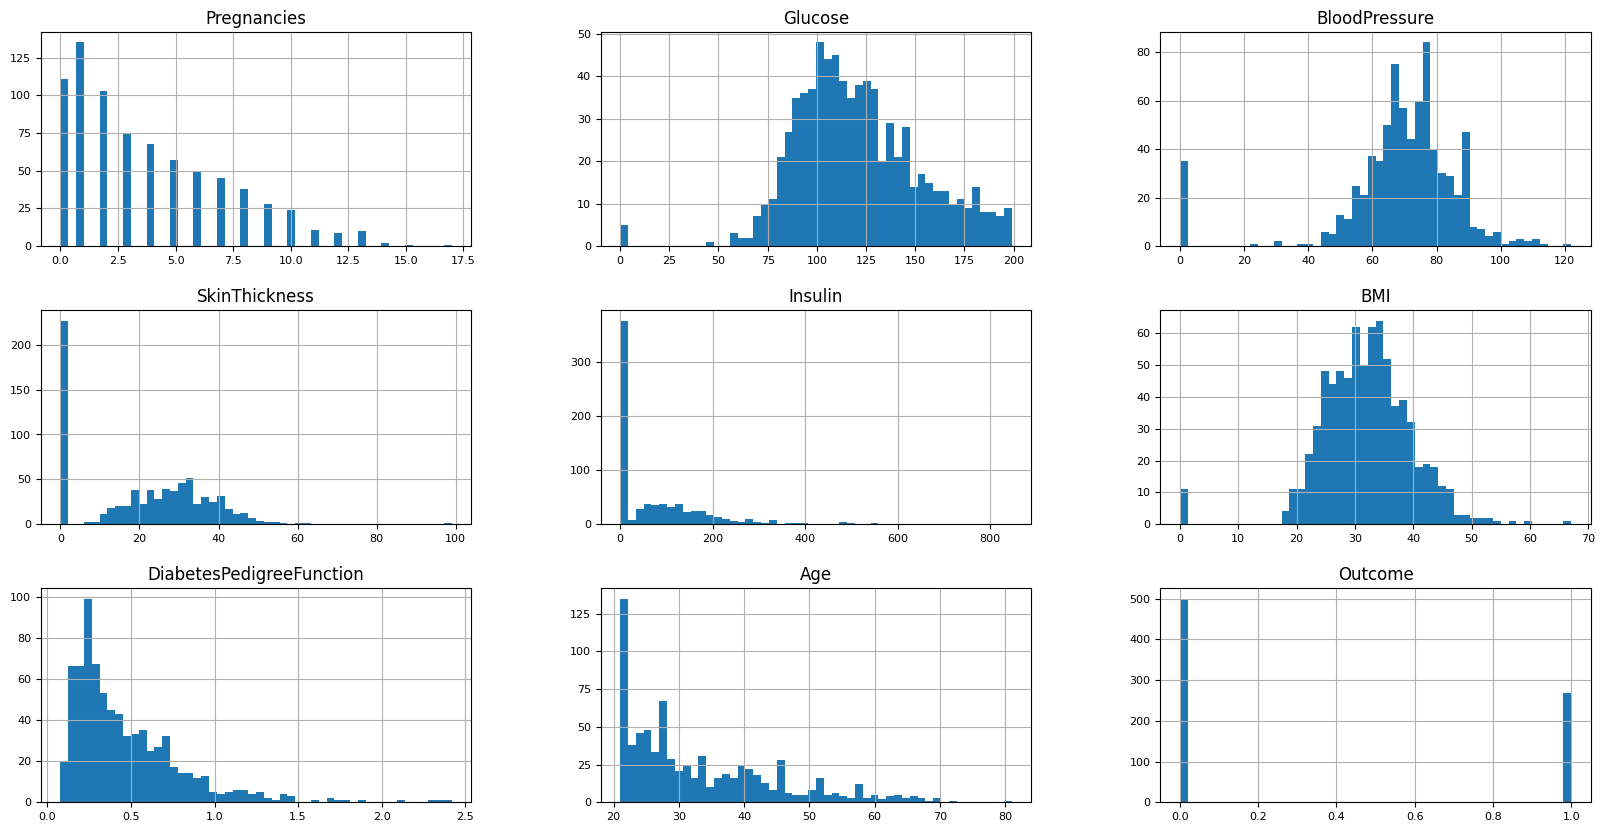

In [16]:
# plot every column
pima_diabetes.hist(figsize=(20, 10), bins=50, xlabelsize=8, ylabelsize=8)
# add labels


## Modeling

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Preprocess Data


In [18]:
# Rename columns in diabetes_csv to match pima_diabetes
diabetes_csv_renamed = diabetes_csv.rename(columns={
    'Diabetic': 'Outcome',
    'DiastolicBloodPressure': 'BloodPressure',
    'DiabetesPedigree': 'DiabetesPedigreeFunction',
    'PlasmaGlucose': 'Glucose',
    'SerumInsulin': 'Insulin',
    'TricepsThickness': 'SkinThickness'
})

# Drop PatientID column if it is not present in pima_diabetes
diabetes_csv_renamed = diabetes_csv_renamed.drop(columns=['PatientID'], errors='ignore')

# Separate features and target variable for both datasets
X_pima = pima_diabetes.drop(columns=['Outcome'])
y_pima = pima_diabetes['Outcome']

X_diabetes = diabetes_csv_renamed.drop(columns=['Outcome'])
y_diabetes = diabetes_csv_renamed['Outcome']

# Scale the features
scaler = StandardScaler()
X_pima_scaled = scaler.fit_transform(X_pima)
X_diabetes_scaled = scaler.fit_transform(X_diabetes)

In [19]:
# Rename columns in diabetes_csv to match pima_diabetes
diabetes_csv_renamed = diabetes_csv.rename(columns={
    'Diabetic': 'Outcome',
    'DiastolicBloodPressure': 'BloodPressure',
    'DiabetesPedigree': 'DiabetesPedigreeFunction',
    'PlasmaGlucose': 'Glucose',
    'SerumInsulin': 'Insulin',
    'TricepsThickness': 'SkinThickness'
})

# Drop PatientID column if it is not present in pima_diabetes
diabetes_csv_renamed = diabetes_csv_renamed.drop(columns=['PatientID'], errors='ignore')

# Separate features and target variable for both datasets
X_pima = pima_diabetes.drop(columns=['Outcome'])
y_pima = pima_diabetes['Outcome']

X_diabetes = diabetes_csv_renamed.drop(columns=['Outcome'])
y_diabetes = diabetes_csv_renamed['Outcome']

# Scale the features
scaler = StandardScaler()
X_pima_scaled = scaler.fit_transform(X_pima)
X_diabetes_scaled = scaler.fit_transform(X_diabetes)

### Split Data

In [20]:
# Split the data into training and testing sets for both datasets
X_pima_train, X_pima_test, y_pima_train, y_pima_test = train_test_split(X_pima_scaled, y_pima, test_size=0.2, random_state=42)
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes_scaled, y_diabetes, test_size=0.2, random_state=42)

### Train Model

In [21]:
# Train a logistic regression model for both datasets
model_pima = LogisticRegression()
model_pima.fit(X_pima_train, y_pima_train)

model_diabetes = LogisticRegression()
model_diabetes.fit(X_diabetes_train, y_diabetes_train)

LogisticRegression()

### Evaluate Model

In [22]:
# Make predictions for both datasets
y_pima_pred = model_pima.predict(X_pima_test)
y_diabetes_pred = model_diabetes.predict(X_diabetes_test)

# Evaluate the model for pima_diabetes
accuracy_pima = accuracy_score(y_pima_test, y_pima_pred)
conf_matrix_pima = confusion_matrix(y_pima_test, y_pima_pred)
class_report_pima = classification_report(y_pima_test, y_pima_pred)

print("PIMA Diabetes Dataset Evaluation:")
print(f"Accuracy: {accuracy_pima}")
print("Confusion Matrix:")
print(conf_matrix_pima)
print("Classification Report:")
print(class_report_pima)

# Evaluate the model for diabetes_csv
accuracy_diabetes = accuracy_score(y_diabetes_test, y_diabetes_pred)
conf_matrix_diabetes = confusion_matrix(y_diabetes_test, y_diabetes_pred)
class_report_diabetes = classification_report(y_diabetes_test, y_diabetes_pred)

print("\nDiabetes CSV Dataset Evaluation:")
print(f"Accuracy: {accuracy_diabetes}")
print("Confusion Matrix:")
print(conf_matrix_diabetes)
print("Classification Report:")
print(class_report_diabetes)

PIMA Diabetes Dataset Evaluation:
Accuracy: 0.7532467532467533
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Diabetes CSV Dataset Evaluation:
Accuracy: 0.7893333333333333
Confusion Matrix:
[[1811  203]
 [ 429  557]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2014
           1       0.73      0.56      0.64       986

    accuracy                           0.79      3000
   macro avg       0.77      0.73      0.74      3000
weighted avg       0.78      0.79      0.78      3000



### Comparing diabetes dataset without high pregnancy and high tricpes thickness 

#### Remove Specific Rows


In [25]:
# Remove rows where pregnancies are max and age is below 25
diabetes_csv_no_max_pregnancies = diabetes_csv.drop(diabetes_csv[(diabetes_csv['Pregnancies'] == diabetes_csv['Pregnancies'].max()) & (diabetes_csv['Age'] < 25)].index)

# Remove rows where triceps thickness is above 90 and age is below 24
diabetes_csv_no_high_triceps = diabetes_csv.drop(diabetes_csv[(diabetes_csv['TricepsThickness'] > 90) & (diabetes_csv['Age'] < 24)].index)

#### Preprocess Data

In [26]:
# Rename columns in the modified datasets to match pima_diabetes
diabetes_csv_no_max_pregnancies_renamed = diabetes_csv_no_max_pregnancies.rename(columns={
    'Diabetic': 'Outcome',
    'DiastolicBloodPressure': 'BloodPressure',
    'DiabetesPedigree': 'DiabetesPedigreeFunction',
    'PlasmaGlucose': 'Glucose',
    'SerumInsulin': 'Insulin',
    'TricepsThickness': 'SkinThickness'
})

diabetes_csv_no_high_triceps_renamed = diabetes_csv_no_high_triceps.rename(columns={
    'Diabetic': 'Outcome',
    'DiastolicBloodPressure': 'BloodPressure',
    'DiabetesPedigree': 'DiabetesPedigreeFunction',
    'PlasmaGlucose': 'Glucose',
    'SerumInsulin': 'Insulin',
    'TricepsThickness': 'SkinThickness'
})

# Drop PatientID column if it is not present in pima_diabetes
diabetes_csv_no_max_pregnancies_renamed = diabetes_csv_no_max_pregnancies_renamed.drop(columns=['PatientID'], errors='ignore')
diabetes_csv_no_high_triceps_renamed = diabetes_csv_no_high_triceps_renamed.drop(columns=['PatientID'], errors='ignore')

# Separate features and target variable for both modified datasets
X_no_max_pregnancies = diabetes_csv_no_max_pregnancies_renamed.drop(columns=['Outcome'])
y_no_max_pregnancies = diabetes_csv_no_max_pregnancies_renamed['Outcome']

X_no_high_triceps = diabetes_csv_no_high_triceps_renamed.drop(columns=['Outcome'])
y_no_high_triceps = diabetes_csv_no_high_triceps_renamed['Outcome']

# Scale the features
scaler = StandardScaler()
X_no_max_pregnancies_scaled = scaler.fit_transform(X_no_max_pregnancies)
X_no_high_triceps_scaled = scaler.fit_transform(X_no_high_triceps)

#### Split Data

In [27]:
# Split the data into training and testing sets for both modified datasets
X_no_max_pregnancies_train, X_no_max_pregnancies_test, y_no_max_pregnancies_train, y_no_max_pregnancies_test = train_test_split(X_no_max_pregnancies_scaled, y_no_max_pregnancies, test_size=0.2, random_state=42)
X_no_high_triceps_train, X_no_high_triceps_test, y_no_high_triceps_train, y_no_high_triceps_test = train_test_split(X_no_high_triceps_scaled, y_no_high_triceps, test_size=0.2, random_state=42)

#### Train Model

In [28]:
# Train a logistic regression model for both modified datasets
model_no_max_pregnancies = LogisticRegression()
model_no_max_pregnancies.fit(X_no_max_pregnancies_train, y_no_max_pregnancies_train)

model_no_high_triceps = LogisticRegression()
model_no_high_triceps.fit(X_no_high_triceps_train, y_no_high_triceps_train)

LogisticRegression()

#### Evaluate Model

In [29]:
# Make predictions for both modified datasets
y_no_max_pregnancies_pred = model_no_max_pregnancies.predict(X_no_max_pregnancies_test)
y_no_high_triceps_pred = model_no_high_triceps.predict(X_no_high_triceps_test)

# Evaluate the model for the dataset without max pregnancies
accuracy_no_max_pregnancies = accuracy_score(y_no_max_pregnancies_test, y_no_max_pregnancies_pred)
conf_matrix_no_max_pregnancies = confusion_matrix(y_no_max_pregnancies_test, y_no_max_pregnancies_pred)
class_report_no_max_pregnancies = classification_report(y_no_max_pregnancies_test, y_no_max_pregnancies_pred)

print("Dataset without max pregnancies for age below 25 Evaluation:")
print(f"Accuracy: {accuracy_no_max_pregnancies}")
print("Confusion Matrix:")
print(conf_matrix_no_max_pregnancies)
print("Classification Report:")
print(class_report_no_max_pregnancies)

# Evaluate the model for the dataset without high triceps thickness
accuracy_no_high_triceps = accuracy_score(y_no_high_triceps_test, y_no_high_triceps_pred)
conf_matrix_no_high_triceps = confusion_matrix(y_no_high_triceps_test, y_no_high_triceps_pred)
class_report_no_high_triceps = classification_report(y_no_high_triceps_test, y_no_high_triceps_pred)

print("\nDataset without high triceps thickness for age below 24 Evaluation:")
print(f"Accuracy: {accuracy_no_high_triceps}")
print("Confusion Matrix:")
print(conf_matrix_no_high_triceps)
print("Classification Report:")
print(class_report_no_high_triceps)

Dataset without max pregnancies for age below 25 Evaluation:
Accuracy: 0.7727727727727728
Confusion Matrix:
[[1708  248]
 [ 433  608]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1956
           1       0.71      0.58      0.64      1041

    accuracy                           0.77      2997
   macro avg       0.75      0.73      0.74      2997
weighted avg       0.77      0.77      0.77      2997


Dataset without high triceps thickness for age below 24 Evaluation:
Accuracy: 0.7789263087695899
Confusion Matrix:
[[1759  260]
 [ 403  577]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2019
           1       0.69      0.59      0.64       980

    accuracy                           0.78      2999
   macro avg       0.75      0.73      0.74      2999
weighted avg       0.77      0.78      0.77      2999



### Interpretation of Results

#### Dataset without max pregnancies for age below 25
- **Accuracy**: 0.77
- **Confusion Matrix**:
  - True Negatives (TN): 1708
  - False Positives (FP): 248
  - False Negatives (FN): 433
  - True Positives (TP): 608
- **Classification Report**:
  - **Precision**: 
    - Class 0: 0.80
    - Class 1: 0.71
  - **Recall**: 
    - Class 0: 0.87
    - Class 1: 0.58
  - **F1-Score**: 
    - Class 0: 0.83
    - Class 1: 0.64

#### Dataset without high triceps thickness for age below 24
- **Accuracy**: 0.78
- **Confusion Matrix**:
  - True Negatives (TN): 1759
  - False Positives (FP): 260
  - False Negatives (FN): 403
  - True Positives (TP): 577
- **Classification Report**:
  - **Precision**: 
    - Class 0: 0.81
    - Class 1: 0.69
  - **Recall**: 
    - Class 0: 0.87
    - Class 1: 0.59
  - **F1-Score**: 
    - Class 0: 0.84
    - Class 1: 0.64

#### PIMA Diabetes Dataset (Reference)
- **Accuracy**: 0.75
- **Confusion Matrix**:
  - True Negatives (TN): 79
  - False Positives (FP): 20
  - False Negatives (FN): 18
  - True Positives (TP): 37
- **Classification Report**:
  - **Precision**: 
    - Class 0: 0.81
    - Class 1: 0.65
  - **Recall**: 
    - Class 0: 0.80
    - Class 1: 0.67
  - **F1-Score**: 
    - Class 0: 0.81
    - Class 1: 0.66

#### Diabetes CSV Dataset
- **Accuracy**: 0.79
- **Confusion Matrix**:
  - True Negatives (TN): 1811
  - False Positives (FP): 203
  - False Negatives (FN): 429
  - True Positives (TP): 557
- **Classification Report**:
  - **Precision**: 
    - Class 0: 0.81
    - Class 1: 0.73
  - **Recall**: 
    - Class 0: 0.90
    - Class 1: 0.56
  - **F1-Score**: 
    - Class 0: 0.85
    - Class 1: 0.63

### Summary and Comparison

1. **Accuracy**:
   - The highest accuracy is observed in the **Diabetes CSV Dataset** (0.79), followed closely by the **Dataset without high triceps thickness for age below 24** (0.78).
   - The **PIMA Diabetes Dataset** has the lowest accuracy (0.75), which serves as the reference.

2. **Precision**:
   - For class 0 (non-diabetic), precision is consistently high across all datasets, with the highest being in the **Dataset without high triceps thickness for age below 24** (0.81).
   - For class 1 (diabetic), precision is highest in the **Diabetes CSV Dataset** (0.73).

3. **Recall**:
   - For class 0, recall is highest in the **Diabetes CSV Dataset** (0.90).
   - For class 1, recall is highest in the **PIMA Diabetes Dataset** (0.67).

4. **F1-Score**:
   - For class 0, the F1-score is highest in the **Diabetes CSV Dataset** (0.85).
   - For class 1, the F1-score is highest in the **PIMA Diabetes Dataset** (0.66).

### Interpretation:
- The **Diabetes CSV Dataset** generally performs better in terms of accuracy and precision for class 1 (diabetic) compared to the reference **PIMA Diabetes Dataset**.
- Removing rows with max pregnancies for age below 25 and high triceps thickness for age below 24 slightly improves the model's performance, but the improvements are marginal.
- The **PIMA Diabetes Dataset** has a balanced recall for both classes, indicating it might be better at identifying diabetic cases compared to the other datasets.

Overall, the **Diabetes CSV Dataset** shows the best performance, but the **PIMA Diabetes Dataset** remains a strong reference due to its balanced recall.

### Looking for improvements

In [30]:
diabetes_csv.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [31]:
pima_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Feature Engineering

##### Create Age Groups and BMI Categories


In [32]:
# Create age groups
diabetes_csv['AgeGroup'] = pd.cut(diabetes_csv['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# Create BMI categories
diabetes_csv['BMICategory'] = pd.cut(diabetes_csv['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

##### Encode Categorical Variables

In [33]:
# One-hot encode the categorical variables
diabetes_csv = pd.get_dummies(diabetes_csv, columns=['AgeGroup', 'BMICategory'], drop_first=True)

##### Preprocess Data

In [34]:
# Drop unnecessary columns
diabetes_csv = diabetes_csv.drop(columns=['PatientID'], errors='ignore')

# Separate features and target variable
X = diabetes_csv.drop(columns=['Diabetic'])
y = diabetes_csv['Diabetic']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Split Data

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

##### Train Model

In [36]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

##### Evaluate Model

In [37]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8413333333333334
Confusion Matrix:
[[1848  166]
 [ 310  676]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2014
           1       0.80      0.69      0.74       986

    accuracy                           0.84      3000
   macro avg       0.83      0.80      0.81      3000
weighted avg       0.84      0.84      0.84      3000



##### Explanation


- Create Age Groups and BMI Categories: Create new categorical features based on age and BMI.
- Encode Categorical Variables: One-hot encode the categorical variables to convert them into numerical format.
- Preprocess Data: Drop unnecessary columns, separate features and target variable, and scale the features.
- Split Data: Split the data into training and testing sets.
- Train Model: Train a logistic regression model using the training data.
- Evaluate Model: Make predictions on the test data and evaluate the model's performance using accuracy, confusion matrix, and classification report.

By implementing these feature engineering steps, you can potentially improve the performance of your logistic regression model.

Collecting workspace information

##### Interpretation:

- **Accuracy**: 0.84
  - This means that 84% of the predictions made by the model are correct.

- **Confusion Matrix**:
  - **True Negatives (TN)**: 1848
    - The model correctly predicted 1848 non-diabetic cases.
  - **False Positives (FP)**: 166
    - The model incorrectly predicted 166 non-diabetic cases as diabetic.
  - **False Negatives (FN)**: 310
    - The model incorrectly predicted 310 diabetic cases as non-diabetic.
  - **True Positives (TP)**: 676
    - The model correctly predicted 676 diabetic cases.

- **Classification Report**:
  - **Class 0 (Non-diabetic)**:
    - **Precision**: 0.86
      - Of all the cases predicted as non-diabetic, 86% were actually non-diabetic.
    - **Recall**: 0.92
      - The model correctly identified 92% of the actual non-diabetic cases.
    - **F1-Score**: 0.89
      - The harmonic mean of precision and recall for non-diabetic cases.
  - **Class 1 (Diabetic)**:
    - **Precision**: 0.80
      - Of all the cases predicted as diabetic, 80% were actually diabetic.
    - **Recall**: 0.69
      - The model correctly identified 69% of the actual diabetic cases.
    - **F1-Score**: 0.74
      - The harmonic mean of precision and recall for diabetic cases.

- **Overall Metrics**:
  - **Macro Average**:
    - **Precision**: 0.83
    - **Recall**: 0.80
    - **F1-Score**: 0.81
  - **Weighted Average**:
    - **Precision**: 0.84
    - **Recall**: 0.84
    - **F1-Score**: 0.84

##### Summary:
- The model performs well with an overall accuracy of 84%.
- It has a high recall for non-diabetic cases (92%) but a lower recall for diabetic cases (69%), indicating it is better at identifying non-diabetic cases.
- The precision for non-diabetic cases is higher (86%) compared to diabetic cases (80%), suggesting fewer false positives for non-diabetic predictions.

#### apply SMOTE and train a logistic regression model on the diabetes_csv dataset:

In [45]:
diabetes_csv_raw = pd.read_csv('data/TAIPEI_diabetes.csv')
diabetes_csv_raw.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [47]:
diabetes_csv.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Original dataset preprocessing
# Create age groups
diabetes_csv['AgeGroup'] = pd.cut(diabetes_csv['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# Create BMI categories
diabetes_csv['BMICategory'] = pd.cut(diabetes_csv['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# One-hot encode the categorical variables
diabetes_csv = pd.get_dummies(diabetes_csv, columns=['AgeGroup', 'BMICategory'], drop_first=True)

# Drop unnecessary columns
diabetes_csv = diabetes_csv.drop(columns=['PatientID'], errors='ignore')

# Separate features and target variable
X = diabetes_csv.drop(columns=['Diabetic'])
y = diabetes_csv['Diabetic']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Remove high pregnancy cases
diabetes_csv_no_high_pregnancies = diabetes_csv.drop(diabetes_csv[(diabetes_csv['Pregnancies'] == diabetes_csv['Pregnancies'].max()) & (diabetes_csv['Age'] < 25)].index)

# Preprocess data without high pregnancy cases
# Create age groups
diabetes_csv_no_high_pregnancies['AgeGroup'] = pd.cut(diabetes_csv_no_high_pregnancies['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# Create BMI categories
diabetes_csv_no_high_pregnancies['BMICategory'] = pd.cut(diabetes_csv_no_high_pregnancies['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# One-hot encode the categorical variables
diabetes_csv_no_high_pregnancies = pd.get_dummies(diabetes_csv_no_high_pregnancies, columns=['AgeGroup', 'BMICategory'], drop_first=True)

# Drop unnecessary columns
diabetes_csv_no_high_pregnancies = diabetes_csv_no_high_pregnancies.drop(columns=['PatientID'], errors='ignore')

# Separate features and target variable
X_no_high_pregnancies = diabetes_csv_no_high_pregnancies.drop(columns=['Diabetic'])
y_no_high_pregnancies = diabetes_csv_no_high_pregnancies['Diabetic']

# Scale the features
scaler = StandardScaler()
X_no_high_pregnancies_scaled = scaler.fit_transform(X_no_high_pregnancies)

# Apply SMOTE to balance the classes
X_no_high_pregnancies_resampled, y_no_high_pregnancies_resampled = smote.fit_resample(X_no_high_pregnancies_scaled, y_no_high_pregnancies)

# Split the resampled data into training and testing sets
X_train_no_high_pregnancies, X_test_no_high_pregnancies, y_train_no_high_pregnancies, y_test_no_high_pregnancies = train_test_split(X_no_high_pregnancies_resampled, y_no_high_pregnancies_resampled, test_size=0.2, random_state=42)

# Train a logistic regression model
model_no_high_pregnancies = LogisticRegression()
model_no_high_pregnancies.fit(X_train_no_high_pregnancies, y_train_no_high_pregnancies)

# Make predictions
y_pred_no_high_pregnancies = model_no_high_pregnancies.predict(X_test_no_high_pregnancies)

# Evaluate the model
accuracy_no_high_pregnancies = accuracy_score(y_test_no_high_pregnancies, y_pred_no_high_pregnancies)
conf_matrix_no_high_pregnancies = confusion_matrix(y_test_no_high_pregnancies, y_pred_no_high_pregnancies)
class_report_no_high_pregnancies = classification_report(y_test_no_high_pregnancies, y_pred_no_high_pregnancies)

print(f"Accuracy without high pregnancies: {accuracy_no_high_pregnancies}")
print("Confusion Matrix without high pregnancies:")
print(conf_matrix_no_high_pregnancies)
print("Classification Report without high pregnancies:")
print(class_report_no_high_pregnancies)

Accuracy: 0.8335
Confusion Matrix:
[[1681  320]
 [ 346 1653]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      2001
           1       0.84      0.83      0.83      1999

    accuracy                           0.83      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.83      0.83      0.83      4000

Accuracy without high pregnancies: 0.8225
Confusion Matrix without high pregnancies:
[[1628  352]
 [ 358 1662]]
Classification Report without high pregnancies:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1980
           1       0.83      0.82      0.82      2020

    accuracy                           0.82      4000
   macro avg       0.82      0.82      0.82      4000
weighted avg       0.82      0.82      0.82      4000



Conclusion:

Removing high pregnancy cases slightly decreased the model's performance in terms of accuracy, precision, recall, and F1-score.
The original dataset performs marginally better overall, suggesting that the high pregnancy cases might contain valuable information for the model.

However, the differences are not substantial, indicating that the model is relatively robust to the removal of these cases.
Overall, while removing high pregnancy cases did not significantly improve the model's performance, it also did not drastically harm it. This suggests that the model is fairly stable and can handle variations in the dataset.



### Analyze variable impact

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Create age groups
diabetes_csv['AgeGroup'] = pd.cut(diabetes_csv['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# Create BMI categories
diabetes_csv['BMICategory'] = pd.cut(diabetes_csv['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# One-hot encode the categorical variables
diabetes_csv = pd.get_dummies(diabetes_csv, columns=['AgeGroup', 'BMICategory'], drop_first=True)

# Drop unnecessary columns
diabetes_csv = diabetes_csv.drop(columns=['PatientID'], errors='ignore')

# Separate features and target variable
X = diabetes_csv.drop(columns=['Diabetic'])
y = diabetes_csv['Diabetic']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Extract and interpret coefficients
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display the coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Impact'] = np.exp(coef_df['Coefficient'])  # Exponentiate the coefficients to interpret them as odds ratios

# Sort the DataFrame by the absolute value of the coefficients
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

print("Feature Impact on Diabetic Outcome:")
print(coef_df)

Accuracy: 0.8335
Confusion Matrix:
[[1679  322]
 [ 344 1655]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      2001
           1       0.84      0.83      0.83      1999

    accuracy                           0.83      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.83      0.83      0.83      4000

Feature Impact on Diabetic Outcome:
                   Feature  Coefficient    Impact
9           AgeGroup_41-50     1.529307  4.614976
10          AgeGroup_51-60     1.517688  4.561666
7                      Age    -1.377014  0.252331
15       BMICategory_Obese     1.345862  3.841495
14  BMICategory_Overweight     1.100130  3.004556
12          AgeGroup_71-80    -1.080697  0.339359
0              Pregnancies     1.002288  2.724509
11          AgeGroup_61-70     0.894071  2.445063
8           AgeGroup_31-40     0.693377  2.000461
4             SerumInsulin     0.513570  1.671247
6 

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

diabetes_csv = diabetes_csv_raw.copy()

# Drop unnecessary columns
diabetes_csv = diabetes_csv.drop(columns=['PatientID'], errors='ignore')

# Separate features and target variable
X = diabetes_csv.drop(columns=['Diabetic'])
y = diabetes_csv['Diabetic']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Extract and interpret coefficients
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display the coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Impact'] = np.exp(coef_df['Coefficient'])  # Exponentiate the coefficients to interpret them as odds ratios

# Sort the DataFrame by the absolute value of the coefficients
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

print("Feature Impact on Diabetic Outcome:")
print(coef_df)

Accuracy: 0.778
Confusion Matrix:
[[1572  429]
 [ 459 1540]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      2001
           1       0.78      0.77      0.78      1999

    accuracy                           0.78      4000
   macro avg       0.78      0.78      0.78      4000
weighted avg       0.78      0.78      0.78      4000

Feature Impact on Diabetic Outcome:
                  Feature  Coefficient    Impact
0             Pregnancies     1.008768  2.742220
7                     Age     0.706328  2.026535
4            SerumInsulin     0.536482  1.709980
5                     BMI     0.515352  1.674227
6        DiabetesPedigree     0.367345  1.443896
3        TricepsThickness     0.330377  1.391493
1           PlasmaGlucose     0.285852  1.330895
2  DiastolicBloodPressure     0.196508  1.217145


Summary

- Model Performance: The model has an overall accuracy of 77.8%, with balanced precision, recall, and F1-scores for both classes.
- Feature Impact:
    - Pregnancies and Age have the highest impact on the likelihood of being diabetic, with odds ratios of approximately 2.74 and 2.03, respectively.
    - SerumInsulin, BMI, DiabetesPedigree, TricepsThickness, PlasmaGlucose, and DiastolicBloodPressure also significantly impact the likelihood of being diabetic, with odds ratios ranging from 1.22 to 1.71.
- Interpretation: The features with the highest positive coefficients (Pregnancies, Age, SerumInsulin, BMI) are the most influential in increasing the probability of being diabetic. Conversely, features with lower coefficients have a smaller impact.